In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

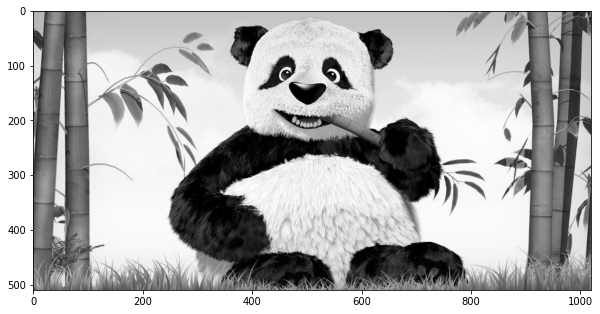

In [6]:
# Converting the image to greyscale make it into a simpler matrix and easy to process
img = Image.open('panda.jpg')
img_gray = img.convert('LA')
plt.figure(figsize=(10, 10))
plt.imshow(img_gray);

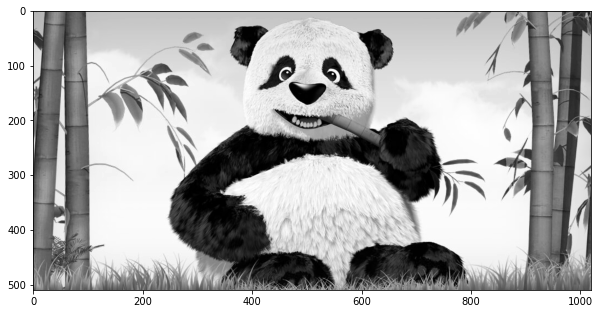

In [7]:
# Just obtained the matrix version of image just to demonstrate that even if we display this matrix its the same as the image
# displayed above. It demonstrates the idea about how images are being stored in form of a matrix within the system
img_matrix = np.array(list(img_gray.getdata(band=0)), float)
img_matrix.shape = (img_gray.size[1], img_gray.size[0])
img_matrix = np.matrix(img_matrix)
plt.figure(figsize=(10,10))
plt.imshow(img_matrix, cmap='gray');

In [15]:
# If you look at the shape of this matrix, it contains 510 rows and 1020 columns, which makes this storage quite large. 
# We will see how SVD prioritises the vectors using the r parameter we discussed above. We will get an awesome image at
# r = 35 to 50 which reduces it a lot from he number 1050
img_matrix.shape

(510, 1020)

In [8]:
# Obtaining these matrices is way easier in python than it is on paper. One single line of code can give 
# good results
U, sigma, V = np.linalg.svd(img_matrix)

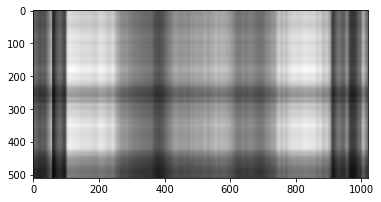

In [9]:
# Using the idea if U1*sigma1*V1(threshold)
# If one can see that even this single product is able to capture the variations in the image
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

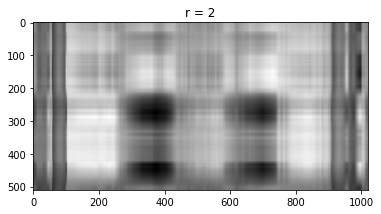

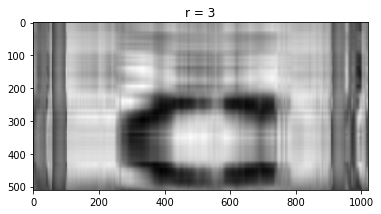

In [13]:
# Let us take more values in range 2 to 4 to see how our SVD performs 
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "r = %s" % i
    plt.title(title)
    plt.show()

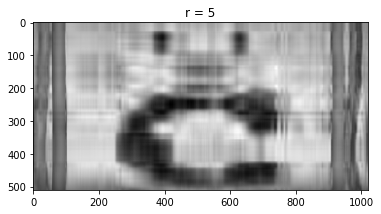

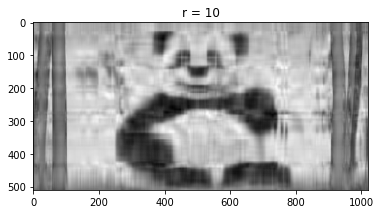

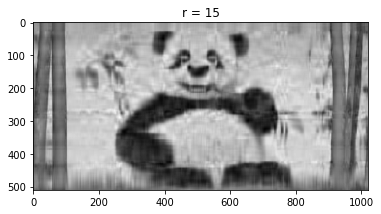

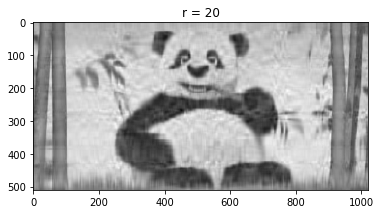

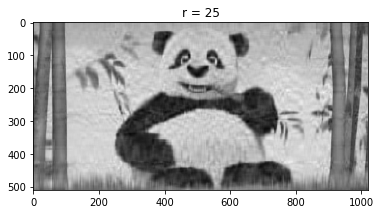

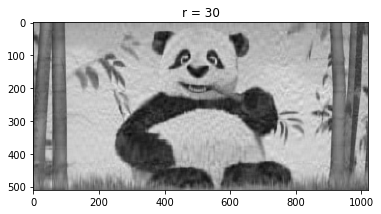

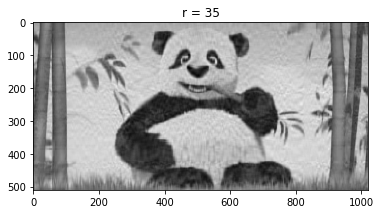

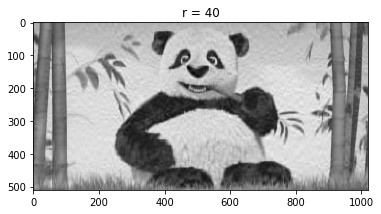

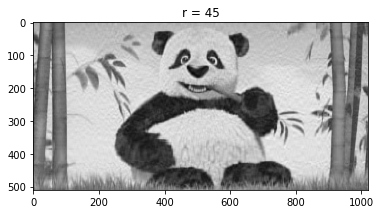

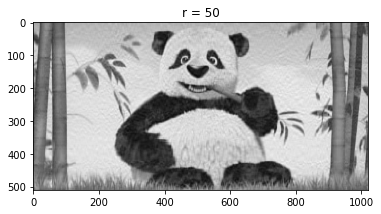

In [12]:
# Now this is amazing as we start to get a very clear picture of panda at r = 25 only 
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "r = %s" % i
    plt.title(title)
    plt.show()